## **Shiv Nikhilkumar Parekh (903998389)**

**<h1>Network Analysis Of Software Repositories: Identifying Subject Matter Experts</h1>**




# 1.   **Finding Total Number of Files modified by the each Author**



In [ ]:
import csv

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the of files modified by each author
author_total_file_count = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)
    current_author = None  # Keeping track of the current author

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 1:
            author = row[1]
            current_author = author  # Updating the current author to author of current commit

            # Setting the file count for the author to zero
            if current_author not in author_total_file_count:
                author_total_file_count[current_author] = 0

            # Moving to next row to check If author has modified file in commit
            next_row = next(reader, None)

            # Checking if the length of row is getter than 0 to assure commit has modified file
            if next_row and len(next_row)>0:
                files_modified = next_row[0]
                # Incrementing the file modified count for the current author under single commit
                author_total_file_count[current_author] += len(files_modified)
                # Moving to next row to check If author has modified file in commit
                next_row = next(reader, None)

# Printing the total number of files modified by each author
for author, total_file_count in author_total_file_count.items():
    print(f"Author: {author}, Total Files Modified: {total_file_count}")


Author: Jean-Philippe Lang, Total Files Modified: 94404
Author: Nicolas Chuche, Total Files Modified: 168
Author: John Goerzen, Total Files Modified: 348
Author: Liwiusz Ociepa, Total Files Modified: 40
Author: Eric Davis, Total Files Modified: 28830
Author: winterheart, Total Files Modified: 1228
Author: Azamat Hackimov, Total Files Modified: 2418
Author: hjust, Total Files Modified: 11767
Author: Mark Maglana, Total Files Modified: 8989
Author: rkh, Total Files Modified: 10486
Author: Nate Lowrie, Total Files Modified: 261
Author: Joe Heck, Total Files Modified: 38
Author: wielinde, Total Files Modified: 56
Author: Joakim Kolsjö, Total Files Modified: 304
Author: w.lindenthal, Total Files Modified: 801
Author: t.felgentreff, Total Files Modified: 7261
Author: friflaj, Total Files Modified: 7784
Author: p.tessenow, Total Files Modified: 10687
Author: Emiliano Heyns, Total Files Modified: 164
Author: Jason Vasquez, Total Files Modified: 43
Author: Holger Just, Total Files Modified: 198



# 2.    **Finding authors who have updated similar files**





In [ ]:
import csv

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the set of files modified by each author
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    current_author = None  # Keeping track of the current author

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 1:
            author = row[1]
            current_author = author  # Updating the current author to author of current commit

            # Initialize the set of modified files for the author if not present
            if current_author not in author_modified_files:
                author_modified_files[current_author] = set()

            # Moving to next row to check If author has modified file in commit
            next_row = next(reader, None)

            # Checking if the length of row is getter than 0 to assure commit has modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with current author in dictionary
                author_modified_files[current_author].update(files_modified)

                next_row = next(reader, None)

# Finding authors who have updated similar files
same_files_authors = {}
for author1, files1 in author_modified_files.items():
    for author2, files2 in author_modified_files.items():
        if author1 != author2:
            common_files = files1.intersection(files2)    # Using intersection method to find similar file
            if common_files:
                # Storing pair of authors and who modified same files in dictionary
                if (author1, author2) not in same_files_authors and (author2, author1) not in same_files_authors:
                    same_files_authors[(author1, author2)] = common_files

# Printing the result
for (author1, author2), common_files in same_files_authors.items():
    print(f"Authors {author1} and {author2} have updated similar files: {common_files}")



# 3. **Finding files modified around 20 times**




In [ ]:
import csv

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the frequency of each modified file
file_frequency = {}

# Dictionary to store the list of files modified by each author along with timestamps
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)
    current_author = None
    current_timestamp = None

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:
            author = row[1]
            timestamp = row[2]

            # Updating the current author and timestamp
            current_author = author
            current_timestamp = timestamp

            # Initialize the list of modified files for the author if not present
            if current_author not in author_modified_files:
                author_modified_files[current_author] = []

            # Moving to next row to check If author has modified file in commit
            next_row = next(reader, None)

            # Checking if the length of row is getter than 0 to assure commit has modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Pairing modified file with the author and timestamp to know who updated file when
                files_modified_with_author_timestamp = [(file.strip(), current_author, current_timestamp) for file in files_modified]
                author_modified_files[current_author].extend(files_modified_with_author_timestamp)

                # Updating the frequency of each modified file
                for file, _, _ in files_modified_with_author_timestamp:
                    file_frequency[file] = file_frequency.get(file, 0) + 1

# Find files modified around 20 times
files_modified_around_20 = [file for file, timestamps in file_frequency.items() if timestamps == 20]

# Print the results
for file in files_modified_around_20:
    for author_files in author_modified_files.values():
        for file_name, author, timestamp in author_files:
            if file_name == file:
                print(f"File '{file}' has been modified around 20 times by author '{author}' with timestamp '{timestamp}'")


File 'app/controllers/roles_controller.rb' has been modified around 20 times by author 'Jean-Philippe Lang' with timestamp '2007-04-07 20:27:19'
File 'app/controllers/roles_controller.rb' has been modified around 20 times by author 'Jean-Philippe Lang' with timestamp '2007-12-02 12:58:07'
File 'app/controllers/roles_controller.rb' has been modified around 20 times by author 'Jean-Philippe Lang' with timestamp '2007-12-07 11:19:30'
File 'app/controllers/roles_controller.rb' has been modified around 20 times by author 'Jean-Philippe Lang' with timestamp '2008-02-16 21:05:10'
File 'app/controllers/roles_controller.rb' has been modified around 20 times by author 'Jean-Philippe Lang' with timestamp '2008-03-15 08:27:38'
File 'app/controllers/roles_controller.rb' has been modified around 20 times by author 'Jean-Philippe Lang' with timestamp '2008-09-28 12:03:17'
File 'app/controllers/roles_controller.rb' has been modified around 20 times by author 'Eric Davis' with timestamp '2010-02-15 16:



# 4.   **Selecting Two (20times) Modified files for showing bi-partite graph of files with Authors who modified it.**





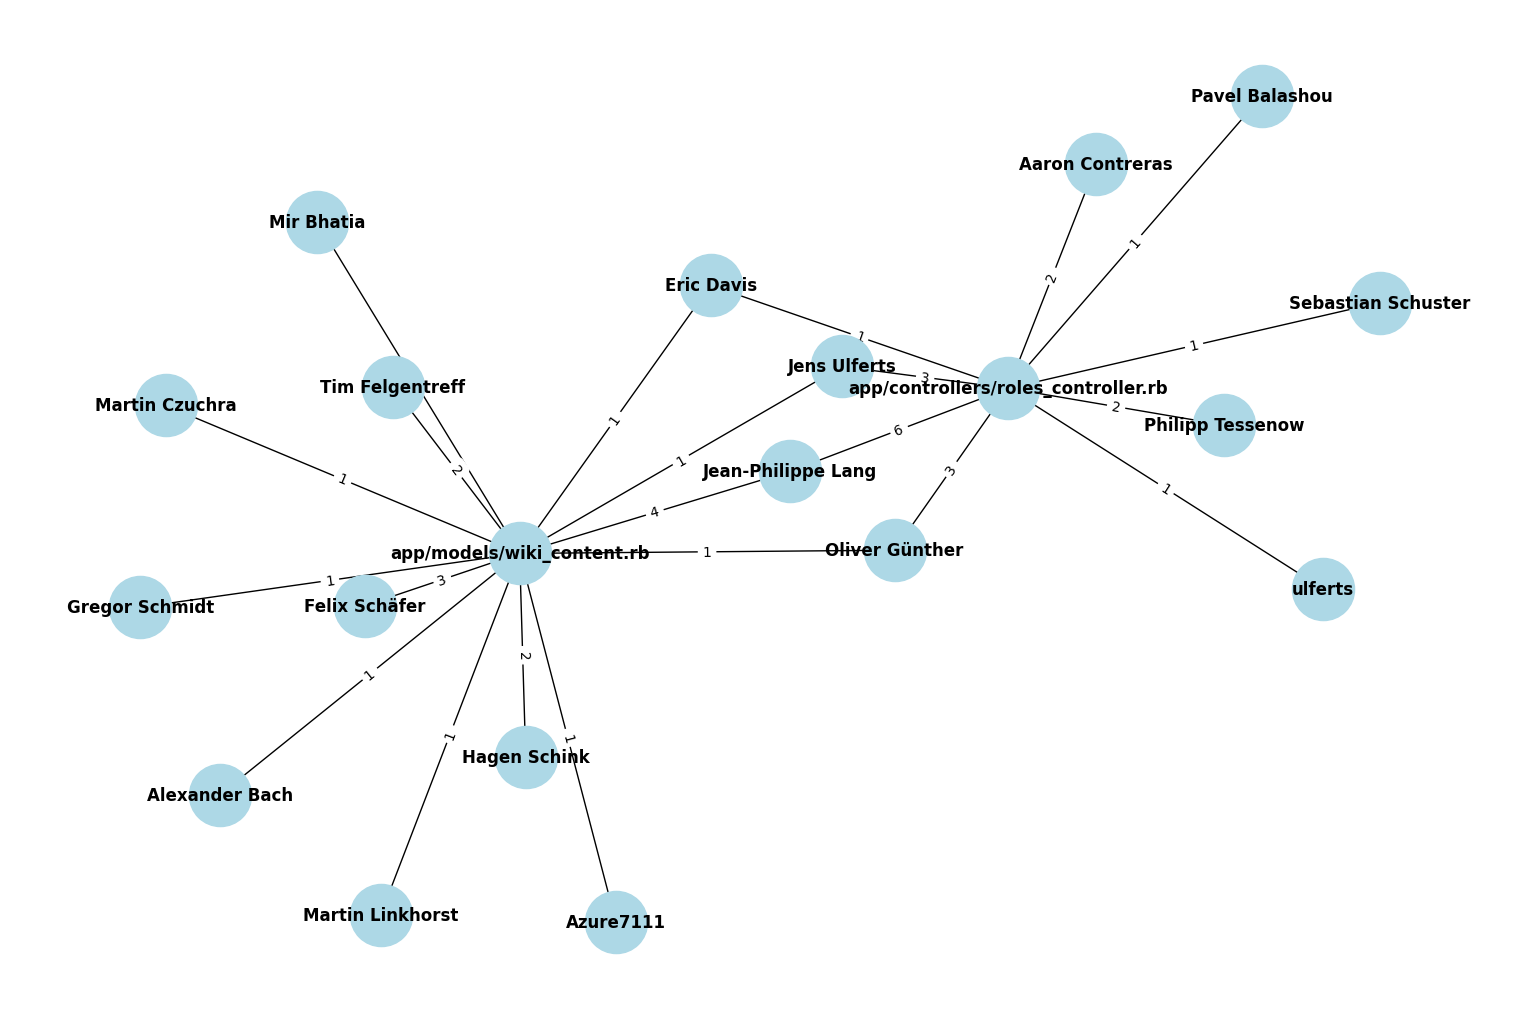

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the frequency of each modified file for each author
author_file_frequency = {}

# Dictionary to store the list of files modified by each author along with timestamps
author_modified_files = {}

# Dictionary to store the total number of modifications for each file
file_frequency = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    current_author = None  # Keeping track of the current author
    current_timestamp = None  # Keep track of the current timestamp for counting files

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:

            author = row[1]
            timestamp = row[2]

            # Updating the current author and timestamp
            current_author = author
            current_timestamp = timestamp

            # Initialize the list of modified files for the author if not present
            if current_author not in author_modified_files:
                author_modified_files[current_author] = set()

            # Moving to the next row to check if the author has modified a file in the commit
            next_row = next(reader, None)

            # Checking if the length of the row is greater than 0 to assure the commit has a modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with the current author in the dictionary
                author_modified_files[current_author].update(files_modified)

                # Updating the frequency of each modified file for the current author
                for file in files_modified:
                    author_file_key = (current_author, file)
                    author_file_frequency[author_file_key] = author_file_frequency.get(author_file_key, 0) + 1
                    # Updating the total frequency of each modified file regardless of the author
                    file_frequency[file] = file_frequency.get(file, 0) + 1

# Finding files modified around 20 times
files_modified_around_20 = [file for file, timestamps in file_frequency.items() if timestamps == 20]

# Selecting only two files to include in the graph for better understanding of its connection to authors
selected_files = ["app/controllers/roles_controller.rb", "app/models/wiki_content.rb"]

# Create a graph
G = nx.Graph()

# Creating nodes for authors and selected modified files
authors_with_modified_files = {author for author, files in author_modified_files.items() if files.intersection(selected_files)}
G.add_nodes_from(authors_with_modified_files, bipartite=0)  # bipartite=0 for authors
G.add_nodes_from(selected_files, bipartite=1)  # bipartite=1 for modified files

# Adding edges between authors and selected modified files with the number of modifications as edge labels
for author, files in author_modified_files.items():
    for file in files:
        if file in selected_files and author in authors_with_modified_files:
            author_file_key = (author, file)
            num_modifications = author_file_frequency.get(author_file_key, 0)
            G.add_edge(author, file, weight=num_modifications)

# Ploting the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=2000)

# Adding edge labels
edge_labels = {(author, file): data['weight'] for author, file, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


# 5. **Creating dictionary to store the list of files modified by each all author displaying only first 10 record**.

In [ ]:
import csv

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the frequency of each modified file
file_frequency = {}

# Dictionary to store the list of files modified by each author along with timestamps
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    current_author = None  # Keeping track of the current author
    current_timestamp = None  # Keep track of the current timestamp for counting files

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:

            author = row[1]
            timestamp = row[2]

            # Updating the current author and timestamp
            current_author = author
            current_timestamp = timestamp

            # Initialize the list of modified files for the author if not present
            if current_author not in author_modified_files:
                author_modified_files[current_author] = []

            # Moving to next row to check If author has modified file in commit
            next_row = next(reader, None)

            # Checking if the length of row is getter than 0 to assure commit has modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Pairing modified file with the author and timestamp to know who updated file when
                files_modified_with_author_timestamp = [(file.strip(), current_author, current_timestamp) for file in files_modified]
                author_modified_files[current_author].extend(files_modified_with_author_timestamp)

    # Printing author_modified_files dictionary for the first 10 authors
    print("Author Modified Files:")
    for author, files_modified in list(author_modified_files.items())[:10]:
        print(f"Author: {author}, Files Modified: {files_modified}")


Author Modified Files:
Author: Jean-Philippe Lang, Files Modified: [('73e0b8f8b3c9350018a7d8fda143dd9b8aa6f091', 'Jean-Philippe Lang', '2006-06-28 17:26:26'), ('redmine/Rakefile', 'Jean-Philippe Lang', '2006-06-28 18:11:03'), ('redmine/.project', 'Jean-Philippe Lang', '2006-06-28 19:54:35'), ('redmine/app/controllers/projects_controller.rb', 'Jean-Philippe Lang', '2006-07-03 19:38:10'), ('redmine/app/controllers/account_controller.rb', 'Jean-Philippe Lang', '2006-07-09 16:30:01'), ('redmine/app/helpers/search_filter_helper.rb', 'Jean-Philippe Lang', '2006-07-09 19:53:13'), ('redmine/doc/CHANGELOG', 'Jean-Philippe Lang', '2006-07-09 20:07:03'), ('redmine/app/helpers/search_filter_helper.rb', 'Jean-Philippe Lang', '2006-07-12 21:35:56'), ('redmine/db/migrate/001_setup.rb', 'Jean-Philippe Lang', '2006-07-29 09:30:20'), ('redmine/app/controllers/account_controller.rb', 'Jean-Philippe Lang', '2006-07-29 09:32:58'), ('redmine/vendor/plugins/localization/README', 'Jean-Philippe Lang', '2006-0

# 6. **Created Bi-partite graph for author and file they modified.(Because its hard to visualize for all author just printing for one.)**

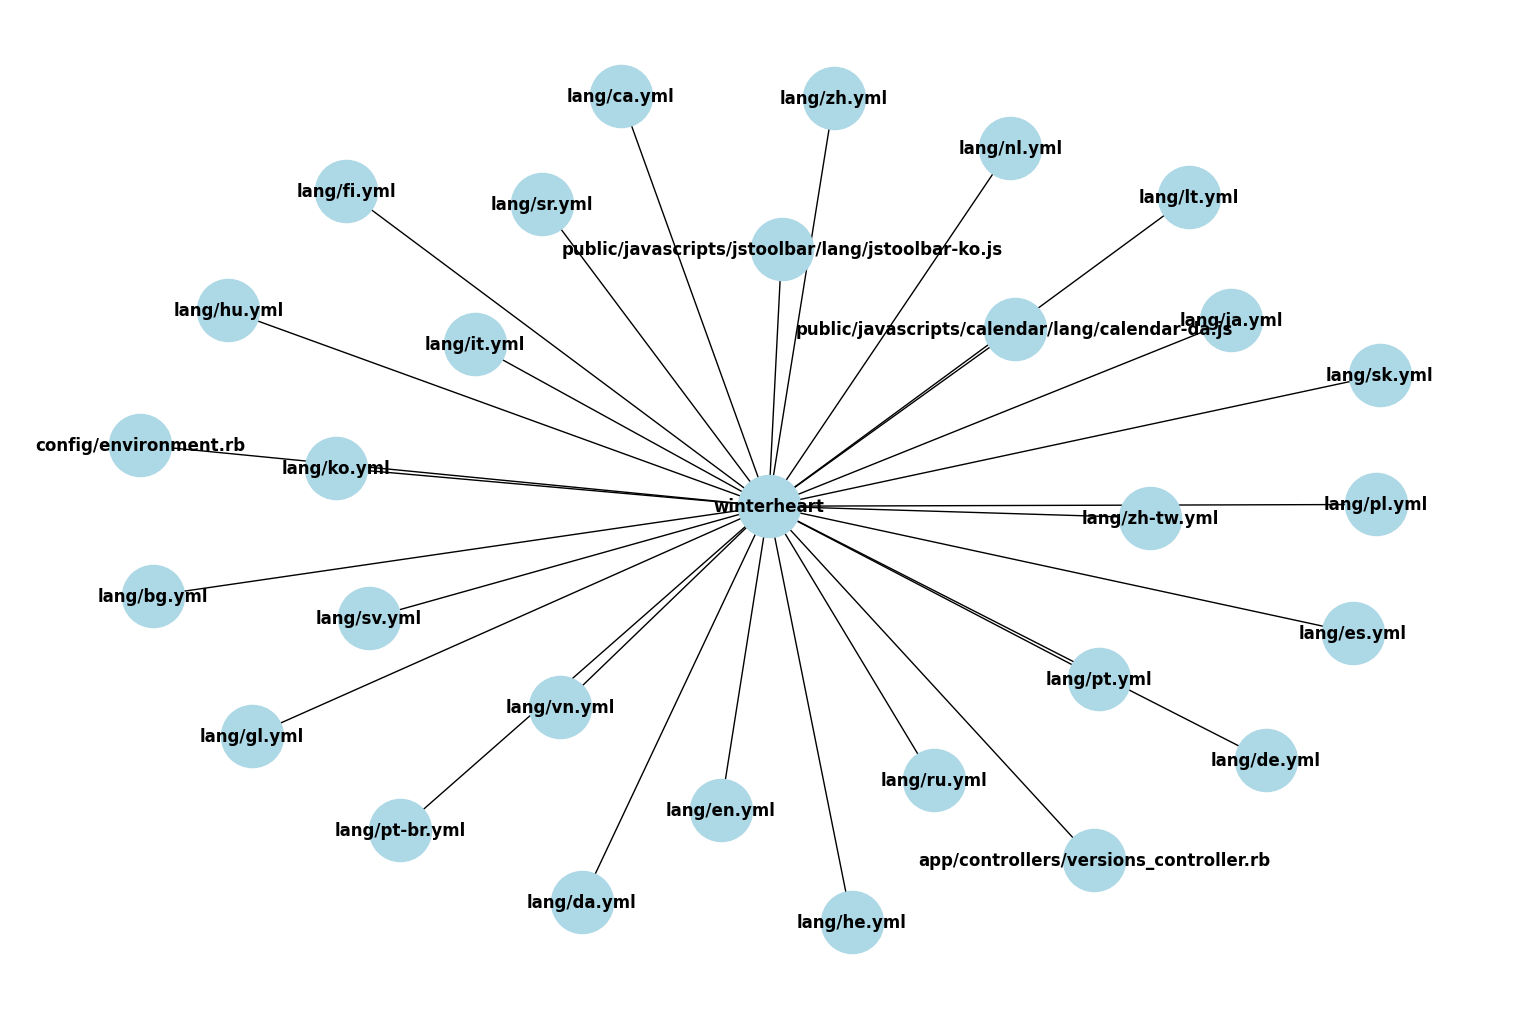

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from itertools import islice


# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the list of files modified by each author
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:
            author = row[1]

            # Initialize the list of modified files for the author if not present
            if author not in author_modified_files:
                author_modified_files[author] = set()

            # Moving to the next row to check if the author has modified a file in the commit
            next_row = next(reader, None)

            # Checking if the length of the row is greater than 0 to assure the commit has a modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with the current author in the dictionary
                author_modified_files[author].update(files_modified)

# Create a bipartite graph
B = nx.Graph()

# Adding nodes with the 'bipartite' attribute
authors = set(author_modified_files.keys())
files = set(file for files_modified_by_author in author_modified_files.values() for file in files_modified_by_author)
B.add_nodes_from(authors, bipartite='authors')
B.add_nodes_from(files, bipartite='files')

# Select the author from who you want to print
target_author = next(islice(author_modified_files.keys(), 5, None))

# Adding edges between all authors and files
for author, files in author_modified_files.items():
    for file in files:
        B.add_edge(author, file)

# Create a subgraph for the target author
subgraph = B.subgraph([target_author] + list(author_modified_files[target_author]))

# Plotting the subgraph for the target author
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=2000)

# Show the plot
plt.show()


# 7. **Projecting Author and Modified Bi-partite graph to Author graph without checking common files(As Per Changes Told In class)**

## 7(a).**Calculating the eigenvector centrality for Author Network not considering the weighted edges. ( If two authors have both modified the same file in the bipartite graph, there will be an edge between them in the projection)**

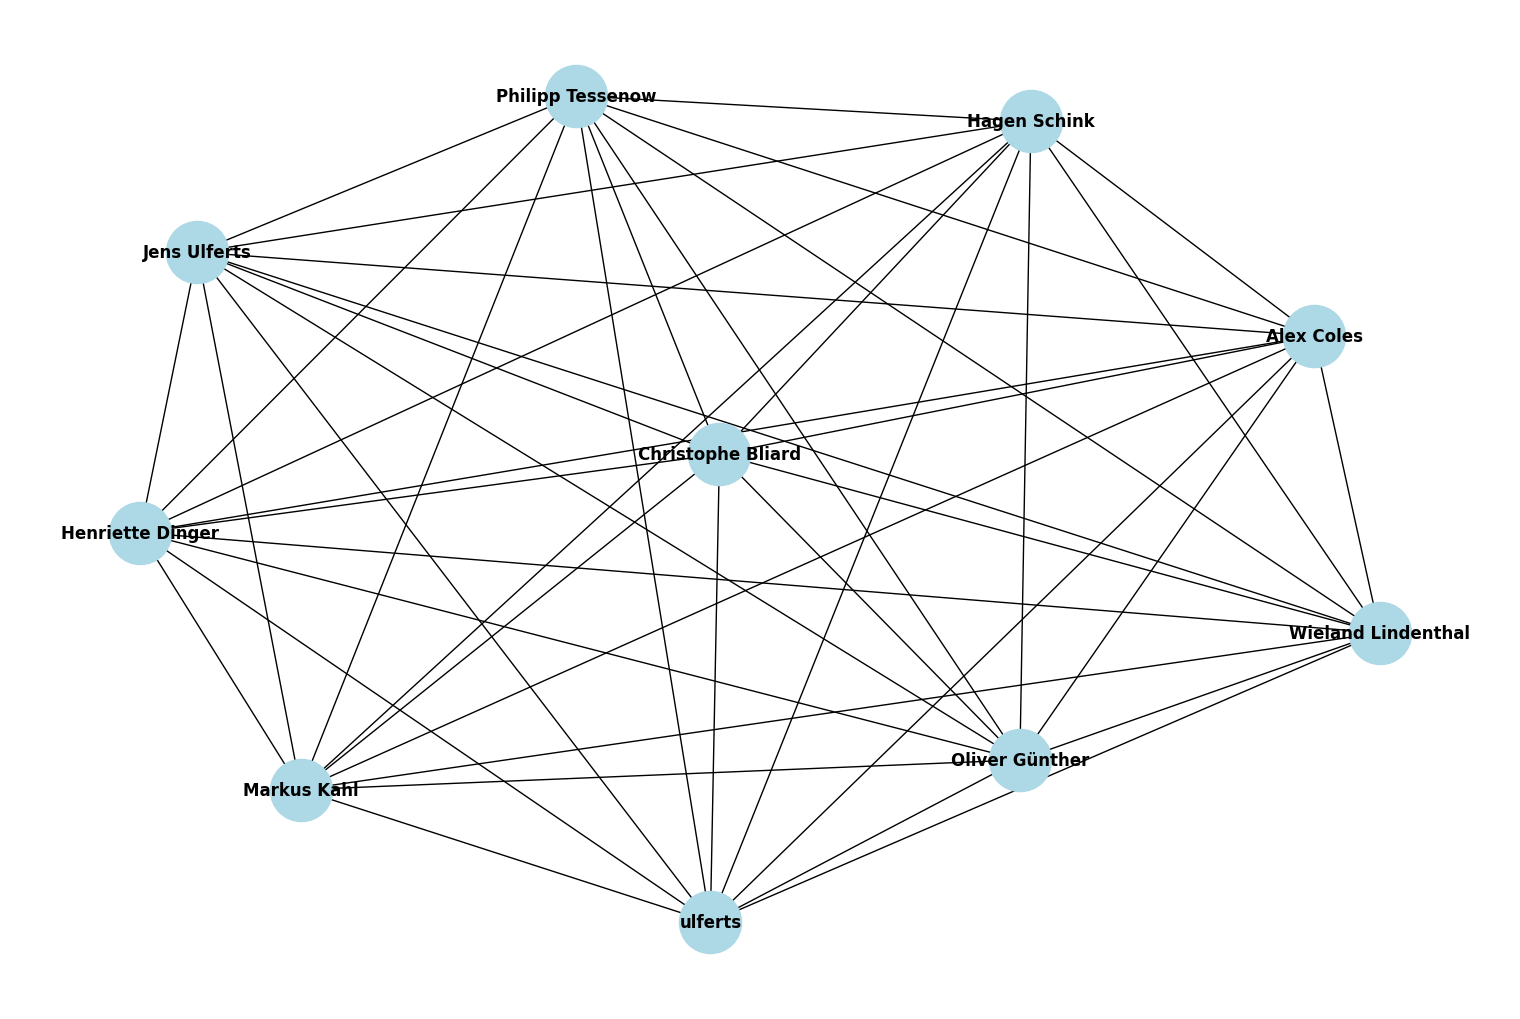

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the list of files modified by each author
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:
            author = row[1]

            # Initialize the list of modified files for the author if not present
            if author not in author_modified_files:
                author_modified_files[author] = set()

            # Moving to the next row to check if the author has modified a file in the commit
            next_row = next(reader, None)

            # Checking if the length of the row is greater than 0 to assure the commit has a modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with the current author in the dictionary
                author_modified_files[author].update(files_modified)

# Creating a bipartite graph
B = nx.Graph()

# Adding nodes
authors = set(author_modified_files.keys())
files = set(file for files_modified_by_author in author_modified_files.values() for file in files_modified_by_author)
B.add_nodes_from(authors, bipartite='authors')
B.add_nodes_from(files, bipartite='files')

# Adding edges between all authors and files
for author, files in author_modified_files.items():
    for file in files:
        B.add_edge(author, file)

# Creating projection of author and modified file bipartite graph onto the set of authors
author_projection = nx.bipartite.projected_graph(B, authors)

# Sorting authors by degree (number of connections)
sorted_authors = sorted(author_projection.nodes, key=lambda x: author_projection.degree(x), reverse=True)

# Selecting top 10 authors
top_10_authors = sorted_authors[:10]

top_10_author_projection = author_projection.subgraph(top_10_authors)

# Plotting the projection for top 10 authors
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(top_10_author_projection)
nx.draw(top_10_author_projection, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=2000)

plt.show()


In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the list of files modified by each author
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:
            author = row[1]

            # Initialize the list of modified files for the author if not present
            if author not in author_modified_files:
                author_modified_files[author] = set()

            # Moving to the next row to check if the author has modified a file in the commit
            next_row = next(reader, None)

            # Checking if the length of the row is greater than 0 to assure the commit has a modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with the current author in the dictionary
                author_modified_files[author].update(files_modified)

# Creating a bipartite graph
B = nx.Graph()

authors = set(author_modified_files.keys())
files = set(file for files_modified_by_author in author_modified_files.values() for file in files_modified_by_author)
B.add_nodes_from(authors, bipartite='authors')
B.add_nodes_from(files, bipartite='files')

# Adding edges between all authors and files
for author, files in author_modified_files.items():
    for file in files:
        B.add_edge(author, file)

author_projection = nx.bipartite.projected_graph(B, authors)

# Calculating eigenvector centrality for authors
eigenvector_centrality = nx.eigenvector_centrality(author_projection)

# Display the eigenvector centrality for each author
print("Eigenvector Centrality:")
for author, centrality in eigenvector_centrality.items():
    print(f"{author}: {centrality}")


Eigenvector Centrality:
max.mehl: 0.0015045825635272851
Aleksey Kurepin: 0.005495717188955367
Eric-Guo: 0.06779334486992249
Markus Kahl: 0.12719630675454965
petrisch: 0.0007741682886059799
jens.ulferts: 0.021176317682125516
Peter Lehwess: 0.08647668591020694
hjust: 0.08858860861126665
Benjamin Bädorf: 0.10213273419661494
Alex Coles: 0.12253543487222907
Joakim Kolsjö: 0.017137492715032517
Rodrigo Rosenfeld Rosas: 0.0050142932585324745
Piyotaro, Kiiroi (きいろい ぴよ太郎): 0.010397243200530393
Semenyuk Dmitriy: 0.004343319170537317
birthe: 0.026349992970396
bsatarnejad: 0.09017366425363918
davidluan: 0.004230256480768679
tbudai: 0.001447228212048451
Tizian Rößler: 0.01024272418942926
Sebastian Schuster: 0.12201401633047546
manuschiller: 0.06532197980344964
Michael Frister: 0.12191178841650598
Hayden Stanko: 0.002988423088991989
Ole Trenner: 0.0014064373672607509
Aron Heinecke: 0.002985831354082925
David Epping: 0.004219357678011422
Spiros Andreou: 0.002987795188339017
CI: 0.0757386064190485
VESp

## 7(b) **Calculating the eigenvector centrality for Author Network considering the weighted edges. ( If two authors have both modified the same file in the bipartite graph, there will be an edge between them in the projection)**

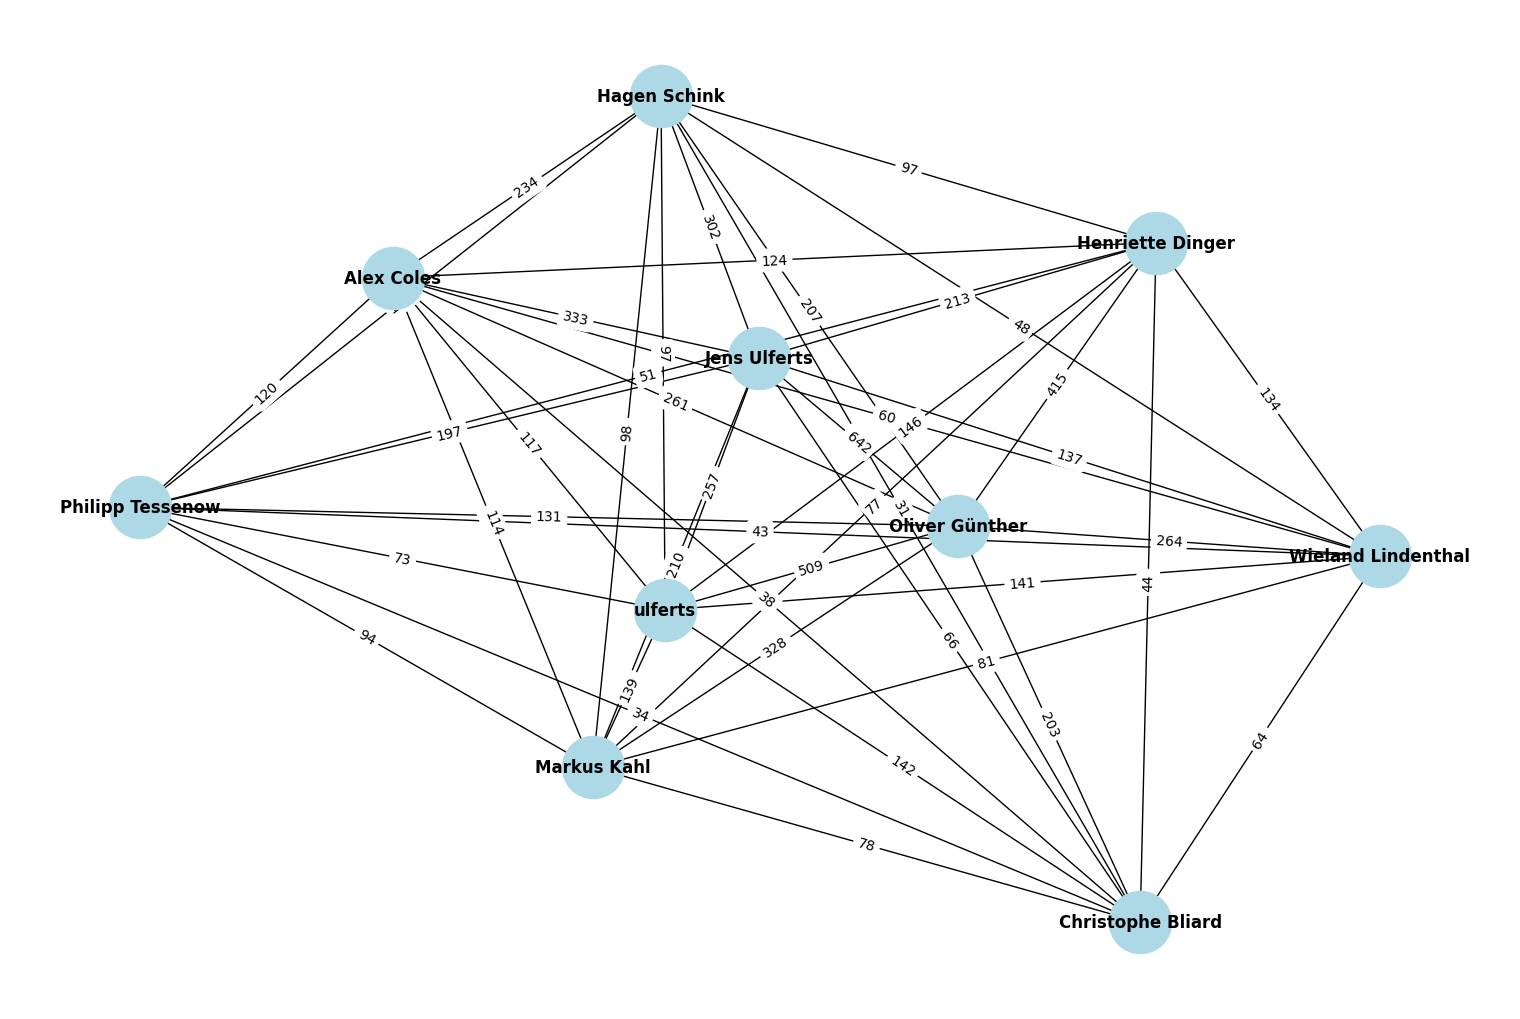

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the list of files modified by each author
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:
            author = row[1]

            # Initialize the list of modified files for the author if not present
            if author not in author_modified_files:
                author_modified_files[author] = set()

            # Moving to the next row to check if the author has modified a file in the commit
            next_row = next(reader, None)

            # Checking if the length of the row is greater than 0 to assure the commit has a modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with the current author in the dictionary
                author_modified_files[author].update(files_modified)

# Creating a bipartite graph
B = nx.Graph()

# Adding nodes
authors = set(author_modified_files.keys())
files = set(file for files_modified_by_author in author_modified_files.values() for file in files_modified_by_author)
B.add_nodes_from(authors, bipartite='authors')
B.add_nodes_from(files, bipartite='files')

# Adding edges between all authors and files
for author, files in author_modified_files.items():
    for file in files:
        B.add_edge(author, file)

# Creating a weighted projection onto the set of authors
weighted_author_projection = nx.bipartite.weighted_projected_graph(B, authors)

# Sorting authors by degree (number of common files modified)
sorted_authors = sorted(weighted_author_projection.nodes, key=lambda x: weighted_author_projection.degree(x), reverse=True)

# Selecting the top 10 authors
top_10_authors = sorted_authors[:10]

top_10_author_projection = weighted_author_projection.subgraph(top_10_authors)

# Plotting the weighted projection for top 10 authors
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(top_10_author_projection)
nx.draw(top_10_author_projection, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=2000)

# Adding edge labels (weights)
edge_labels = {(author1, author2): data['weight'] for author1, author2, data in top_10_author_projection.edges(data=True)}
nx.draw_networkx_edge_labels(top_10_author_projection, pos, edge_labels=edge_labels)

# Show the plot
plt.show()


In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the list of files modified by each author
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:
            author = row[1]

            # Initialize the list of modified files for the author if not present
            if author not in author_modified_files:
                author_modified_files[author] = set()

            # Moving to the next row to check if the author has modified a file in the commit
            next_row = next(reader, None)

            # Checking if the length of the row is greater than 0 to assure the commit has a modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with the current author in the dictionary
                author_modified_files[author].update(files_modified)

# Creating a bipartite graph
B = nx.Graph()

# Adding nodes
authors = set(author_modified_files.keys())
files = set(file for files_modified_by_author in author_modified_files.values() for file in files_modified_by_author)
B.add_nodes_from(authors, bipartite='authors')
B.add_nodes_from(files, bipartite='files')

# Adding edges between all authors and files
for author, files in author_modified_files.items():
    for file in files:
        B.add_edge(author, file)

# Creating a weighted projection onto the set of authors
weighted_author_projection = nx.bipartite.weighted_projected_graph(B, authors)

# Calculate weighted eigenvector centrality for authors
eigenvector_centrality = nx.eigenvector_centrality_numpy(weighted_author_projection, weight='weight')

# Display the weighted eigenvector centrality for each author
print("Weighted Eigenvector Centrality:")
for author, centrality in eigenvector_centrality.items():
    print(f"{author}: {centrality}")


Weighted Eigenvector Centrality:
max.mehl: 0.0002056057139461528
Aleksey Kurepin: 0.0003601383811288763
Eric-Guo: 0.0021758079481512893
Markus Kahl: 0.22118468376021927
petrisch: 7.048188918000585e-06
jens.ulferts: 0.0009663419295427027
Peter Lehwess: 0.02188756137239247
hjust: 0.019159099249437577
Benjamin Bädorf: 0.061026707923623205
Alex Coles: 0.2646954950887518
Joakim Kolsjö: 0.0005800778094739975
Rodrigo Rosenfeld Rosas: 0.00011120949238122633
Piyotaro, Kiiroi (きいろい ぴよ太郎): 0.0009133684894232184
Semenyuk Dmitriy: 0.0004039459756337236
birthe: 0.006049571718211071
bsatarnejad: 0.04904195106940471
davidluan: 2.9813623937992697e-05
tbudai: 0.00012660357651049896
Tizian Rößler: 0.0005283752477592784
Sebastian Schuster: 0.15834250754420545
manuschiller: 0.015544469546918257
Michael Frister: 0.10391234200691887
Hayden Stanko: 0.0003954427707163357
Ole Trenner: 0.00010806057262345017
Aron Heinecke: 0.0003323592209525323
David Epping: 0.00029169996134853027
Spiros Andreou: 0.0003056598744

Unweighted Graphs: If graph is unweighted each edge is treated equally, and the algorithm assumes that all edges have the same importance in terms of community structure.

# 8. **Greedy Method Using IGraph** (When we use the **weights parameter**, the algorithm takes these weights into consideration, and communities are detected based on the strength of connections).


In [ ]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.0 MB/s eta 0:00:00


In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from igraph import Graph

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the list of files modified by each author
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:
            author = row[1]

            # Initialize the list of modified files for the author if not present
            if author not in author_modified_files:
                author_modified_files[author] = set()

            # Moving to the next row to check if the author has modified a file in the commit
            next_row = next(reader, None)

            # Checking if the length of the row is greater than 0 to assure the commit has a modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with the current author in the dictionary
                author_modified_files[author].update(files_modified)

# Create a bipartite graph
B = nx.Graph()

# Adding nodes with the 'bipartite' attribute
authors = set(author_modified_files.keys())
files = set(file for files_modified_by_author in author_modified_files.values() for file in files_modified_by_author)
B.add_nodes_from(authors, bipartite='authors')
B.add_nodes_from(files, bipartite='files')

# Adding edges between all authors and files
for author, files in author_modified_files.items():
    for file in files:
        B.add_edge(author, file)

# Creating weighted projection onto the set of authors
weighted_author_projection = nx.bipartite.weighted_projected_graph(B, authors)

# Converting the NetworkX graph to an iGraph graph
ig_graph = Graph.TupleList([(str(edge[0]), str(edge[1]), weight) for edge, weight in nx.get_edge_attributes(weighted_author_projection, 'weight').items()],
                           directed=False, weights=True)

# Applying Greedy Algorithm with edge weights
dendrogram = ig_graph.community_fastgreedy(weights='weight')

communities = dendrogram.as_clustering()

# Display the communities
for idx, community in enumerate(communities):
    print(f"Community {idx + 1}: {community}")



Community 1: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 14, 15, 17, 25, 34, 36, 39, 40, 43, 45, 47, 55, 56, 60, 63, 66, 68, 70, 71, 72, 76, 79, 83, 85, 86, 92, 93, 95, 97, 98, 99, 101, 103, 105, 109, 116, 117, 121, 124, 125, 131, 132, 134, 136, 139, 143, 146, 151, 155, 156, 160, 164, 166, 167, 170, 174, 177, 178, 180, 191, 192, 204, 211, 226, 227, 233, 234, 238, 239, 241, 242, 256, 258, 259, 260, 261, 262, 265, 272, 274, 278, 279, 285, 286, 290, 291, 292, 293, 294, 297, 299, 300, 301, 302, 303, 304, 306, 309, 310]
Community 2: [7, 13, 16, 18, 19, 21, 23, 26, 27, 29, 30, 32, 33, 35, 44, 46, 48, 49, 50, 51, 52, 53, 54, 59, 61, 64, 65, 67, 81, 87, 100, 104, 106, 110, 115, 118, 119, 126, 138, 141, 142, 144, 148, 153, 154, 162, 165, 168, 172, 182, 183, 185, 186, 187, 188, 189, 194, 195, 200, 206, 209, 212, 213, 214, 215, 216, 217, 229, 230, 231, 232, 235, 236, 237, 248, 249, 250, 251, 252, 253, 254, 255, 257, 273, 275, 283, 284, 308]
Community 3: [9, 20, 24, 28, 31, 37, 38, 41, 57, 94, 111, 113, 123,

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from igraph import Graph

# Specifying CSV file
csv_file_path = 'git_logs_simplified_filenames.csv'

# Dictionary to store the list of files modified by each author
author_modified_files = {}

with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)

    for row in reader:
        # Checking if the row contains commit info
        if len(row) > 2:
            author = row[1]

            # Initialize the list of modified files for the author if not present
            if author not in author_modified_files:
                author_modified_files[author] = set()

            # Moving to the next row to check if the author has modified a file in the commit
            next_row = next(reader, None)

            # Checking if the length of the row is greater than 0 to assure the commit has a modified file
            if next_row and len(next_row) > 0:
                files_modified = next_row[0].split(',')
                # Adding modified files with the current author in the dictionary
                author_modified_files[author].update(files_modified)

# Create a bipartite graph
B = nx.Graph()

# Adding nodes with the 'bipartite' attribute
authors = set(author_modified_files.keys())
files = set(file for files_modified_by_author in author_modified_files.values() for file in files_modified_by_author)
B.add_nodes_from(authors, bipartite='authors')
B.add_nodes_from(files, bipartite='files')

# Adding edges between all authors and files
for author, files in author_modified_files.items():
    for file in files:
        B.add_edge(author, file)

weighted_author_projection = nx.bipartite.weighted_projected_graph(B, authors)
ig_graph = Graph.TupleList([(str(edge[0]), str(edge[1]), weight) for edge, weight in nx.get_edge_attributes(weighted_author_projection, 'weight').items()],
                           directed=False, weights=True)
dendrogram = ig_graph.community_fastgreedy(weights='weight')
communities = dendrogram.as_clustering()

# Convertin authors set to a list
authors_list = list(authors)

# Display the communities with author name
for idx, community in enumerate(communities):
    # Use list comprehension to get author names from indices
    community_authors = [authors_list[i] for i in community]
    print(f"Community {idx + 1}: {', '.join(community_authors)}")


Community 1: max.mehl, Aleksey Kurepin, Eric-Guo, Markus Kahl, petrisch, jens.ulferts, Peter Lehwess, Benjamin Bädorf, Joakim Kolsjö, Rodrigo Rosenfeld Rosas, birthe, bsatarnejad, tbudai, David Epping, ibussieres, Edoardo Operti, slawa, Andrej Sandorf, jakubbialas, Sandro Munda, Birthe, Christian Eichert, Mihail Maxacov, Nick Peelman, Mika Lahti, Nicolas Chuche, kgalli, The Gitter Badger, RobinWagner, as-op, Rune Henriksen, Anil Dias Davis, Ion Biziiac, Adam Szabo, Continuous Integration, Swikriti Tripathi, Nate Lowrie, Kabiru Mwenja, mhirtie, delinde, Oleksandr Sementsov, friflaj, Martin Linkhorst, Aidas Kasparas, dollinad, HDinger, Carsten Klein, jplang, a666, a0aa11b8063d243cde198ad0c33e5e88cfe65698, Breno Zeymer, luzpaz, Maxime Guilbot, Stefan Hugtenburg, Tom Rochette, Fahad Alduraibi, Klaus Zanders, Michael Hierweck, Loumarven, Daniel Passos, Torben Köhler, Jagadeeshan S, wielinde, Gunter Ohrner, Hirtie Maxim, Dmitrii, Steffen Kirschke, Sven R. Kunze, Evghenii Barhatov, kebhr, Yur